In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Dataset.csv")
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#for extracting null values in different columns
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

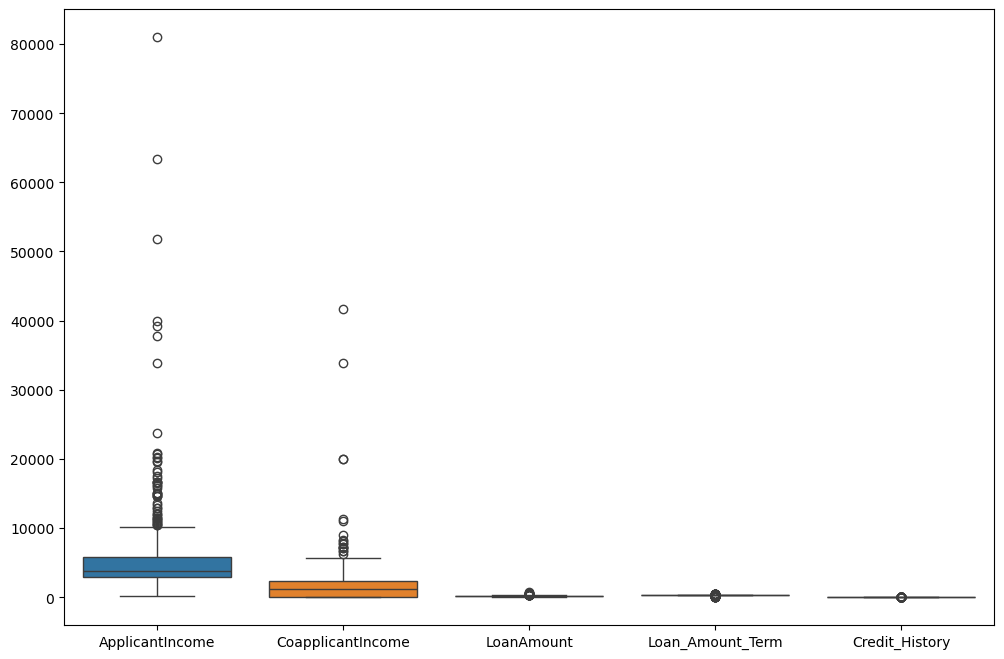

In [5]:
#checking outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data = data)
plt.show()

In [7]:
#filling the null values of numericaldata type
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [8]:
#filling the nulll values of object datatype
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

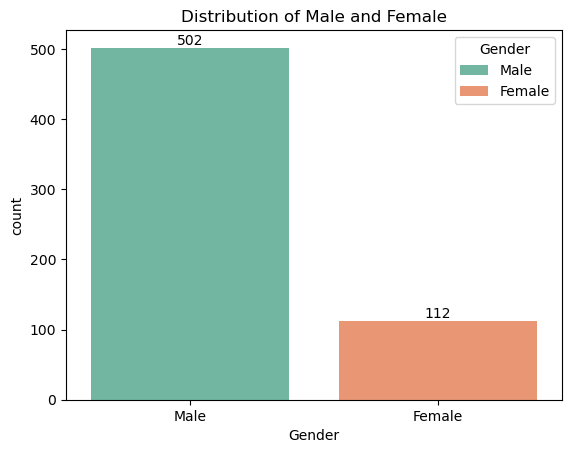

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

count = data['Gender'].value_counts()
count1 = data['Gender'].value_counts(normalize=True) * 100  # Percentage distribution

ax = sns.countplot(data=data, x='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Customize the legend
legend_labels = ['Male', 'Female']
plt.legend(handles=ax.patches, labels=legend_labels, title='Gender', loc='upper right')

# Set title
plt.title("Distribution of Male and Female")

# Display the plot
plt.show()



In [24]:
mean_income = data.groupby('Gender')['ApplicantIncome'].mean().reset_index()
mean_income


,Gender,ApplicantIncome
0,Female,4643.473214
1,Male,5573.017928


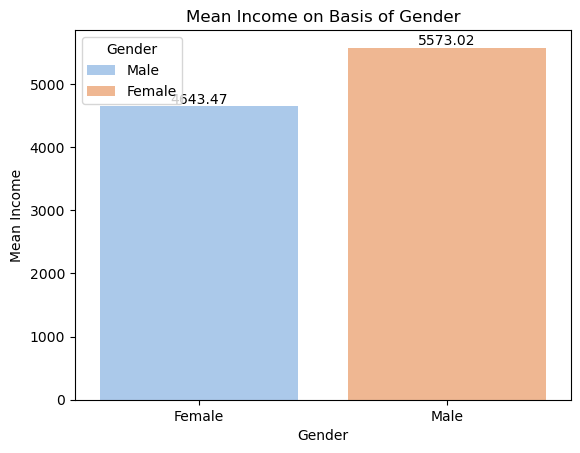

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'mean_income' is your DataFrame with 'Gender' and 'ApplicantIncome' columns
fig, ax = plt.subplots()
sns.barplot(data=mean_income, x='Gender', y='ApplicantIncome', palette='pastel', ax=ax)

# Add data labels manually
for container in ax.containers:
    ax.bar_label(container)
    # Customize the legend
legend_labels = ['Male', 'Female']
plt.legend(handles=ax.patches, labels=legend_labels, title='Gender', loc='upper left')



# Set title and labels
ax.set_title("Mean Income on Basis of Gender")
ax.set_ylabel('Mean Income')

# Display the plot
plt.show()
